<b>  Group 21 Project Proposal: Heart Disease </b> 

<b>Introduction</b>

   To better understand heart disease, it is important to look at the key factors that influence an individual’s risk of having this condition. High blood pressure places extra exertion on blood vessels, increasing tension on the arteries, which decreases blood flow to major organs and oxyen to the heart. Having high levels of cholesterol could cause fat deposits to build up in the arteries, making it more challenging for blood to flow freely through the body. For maximum heart rate, reaching the ideal heart rate range can indicate if the heart is in good condition. An increase in age is often correlated with a higher risk for heart disease. Lastly, incidence of chest pain can be a risk factor for heart disease if evaluated at abnormal levels.
    
  <br/> The question we want to answer is: are we able to predict whether a patient has heart disease based on their health profile? The information used to answer this question will be from the heart disease dataset, and used to create an accurate prediction model to classify new data. 


<b> Preliminary Exploratory Data Analysis </b>

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

sex,the_predicted_attribute,mean(chol),mean(thalach),mean(trestbps)
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Female,Negative,253.6852,155.5000,127.8148
Female,Positive,274.3684,144.2105,147.0000
Male,Negative,233.7826,161.9710,129.6087
Male,Positive,245.3256,138.4651,131.8023


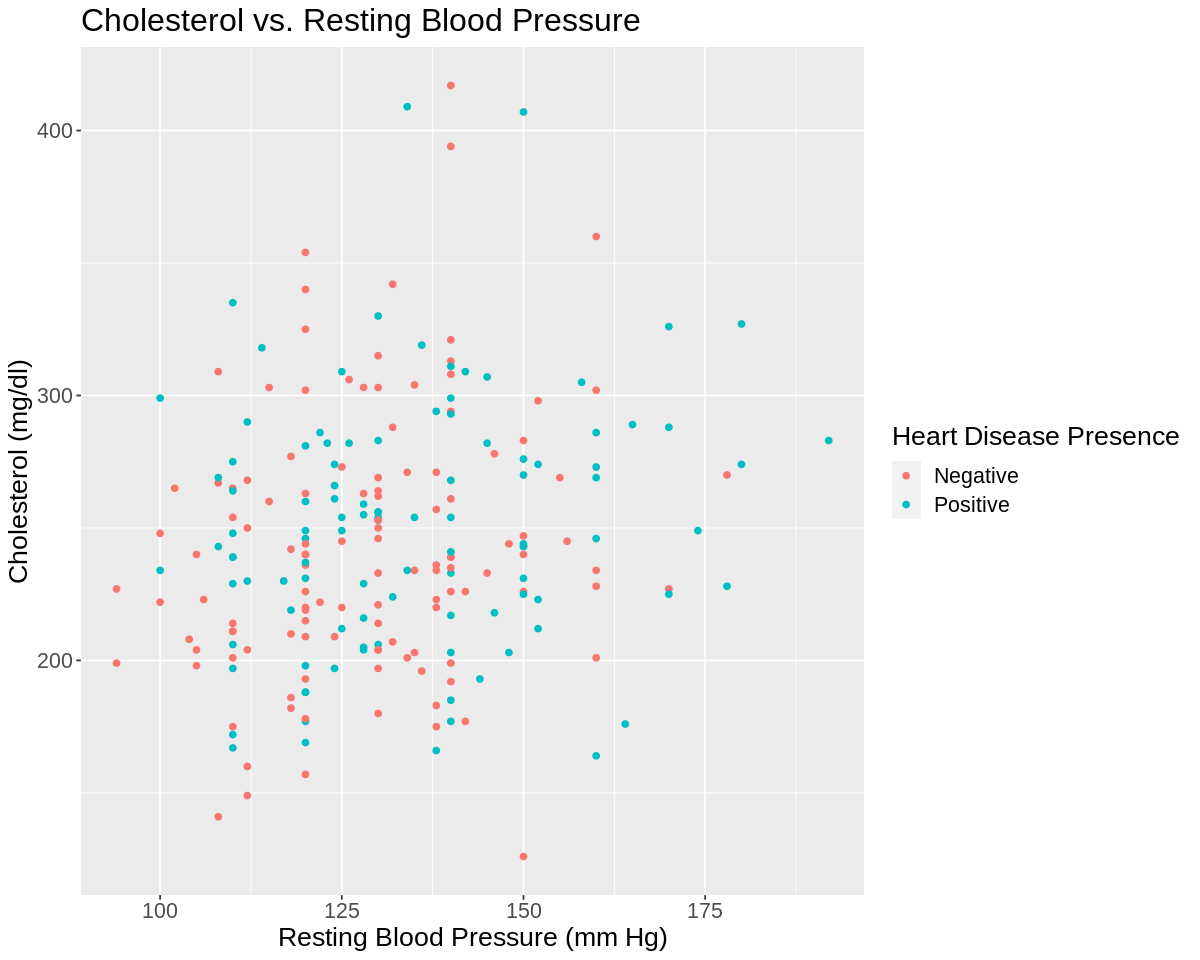

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

# Setting the seed
set.seed(3456)

# Reading in the data
rd <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
               col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","the_predicted_attribute"))

# Selecting desired columns for analysis
HD_selected <- select(rd,sex,trestbps,chol,the_predicted_attribute,thalach,cp,age)

# Changing "predicted attribute" from a 0-4 scale to a factor, either "Positive" or "Negative" for the presence or absence of heart disease respectively
HD_mutated <- mutate(HD_selected,the_predicted_attribute=ifelse(the_predicted_attribute==0,"Negative","Positive"))%>%
            mutate(the_predicted_attribute=as.factor(the_predicted_attribute))

# Splitting the data into train/test split
HD_split <- initial_split(HD_mutated, prop = 3/4, strata = the_predicted_attribute)  
HD_train <- training(HD_split)   
HD_test  <- testing(HD_split)

# Creating summary data table with mean chol, thalach, trestbps; grouped by sex and heart condition
HD_summarize <- HD_train%>%
                group_by(sex,the_predicted_attribute)%>%
                summarize(mean(chol),mean(thalach),mean(trestbps))%>%
                mutate(sex=ifelse(sex==1,"Male","Female"))
HD_summarize

# Visualization of cholesterol (chol) levels vs resting blood pressure (trestbps), coloured by heart disease presence/absence
options(repr.plot.width = 10, repr.plot.height = 8)

chol_vs_trestbps_plot <- ggplot(HD_train,aes(x = trestbps,y = chol, color = the_predicted_attribute))+
                            geom_point() +
                            labs(x = "Resting Blood Pressure (mm Hg)",
                                 y = "Cholesterol (mg/dl)",
                                 title = "Cholesterol vs. Resting Blood Pressure",
                                 color = "Heart Disease Presence") +
                            theme(text = element_text(size=16))
chol_vs_trestbps_plot


<b>Methods</b>

   We will use the heart disease data collected from the Cleveland hospital. Cholesterol levels (chol), resting blood pressure (trestbps), age (age), chest pain (cp), and maximum heart rate (thalach) are the variables that will be used as the predictors in our classification model, due to their strong association with heart disease. We will use the K-nearest neighbor classification algorithm to predict the presence of heart disease, or the “predicted attribute”, which we have simplified to a binary factor that indicates its presence or absence. 75% of the total data will be used as training data, while the remaining 25% will be used as testing data. Cross-validation will be used during data training to increase the accuracy of our prediction. A scatter plot will be used to visualize the correlation between what we believe to be two major variables and indicators of heart disease, cholesterol and resting blood pressure. The points will be coloured based on the presence of heart disease in each patient. Resting blood pressure and cholesterol will be plotted on the x and y axes respectively. 

<b>Expected Outcomes and Future Applications</b>

   We expect our model to predict heart disease in patients with high cholesterol, resting blood pressure, and maximum heart rate, since these indications are linked to heart disease in scientific literature. Moreover, we expect older individuals to be more susceptible to heart disease, along with those experiencing abnormal levels of chest pain. These findings are important to inform the general public on potential risk factors for heart disease, serving as preventive knowledge. Individuals with high cholesterol, blood pressure, or abnormal levels of chest pain should be aware of the risk for heart disease, and should seek medical attention for further guidance. However, variables in our project such as maximum heart rate, which have looser associations with heart disease, can be studied to better understand its impact. Future data analysis should determine whether our findings can be applied to rare or more extreme cases of heart disease.
